#### Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

#### Reading Modeling Data

In [2]:
#full transaction dataset

df = pd.read_csv('./data/model_data_v1.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.shape

(19784, 58)

In [3]:
df.head(3)

,date,token_id,payment,buyer,seller,price,priceUsd,1/1,4:20 watch,background,...,shirt_score,short_hair_score,smoke_score,type_score,rarity_score,1d_avg_price,7d_avg_price,30d_avg_price,average_price,floor_price
0,2021-11-30 21:27:04+00:00,367,ETH,0xa76ae53049e3c5f8f30954f804da503b15040cc1,0xb3d6dbc54ed91bcc84da7871fc9e146e7f13c496,1.00,4650.538658,0,sub lantern (green),graveyard,...,33.112583,0.0,2.677376,112.359551,536.950704,3.235565,4.122053,2.510842,1.147349,2.79
1,2021-11-30 21:29:41+00:00,5039,ETH,0xde06ffb76c61b51d11aa593b5fe175a59d43e78f,0x6a61925dcdf27d8b28c11ec76228b4195a978069,0.69,3208.871674,0,sub lantern (green),orange,...,18.148820,0.0,2.624672,1.690331,247.762786,3.235565,4.122053,2.510842,1.147349,2.79
2,2021-11-30 21:32:17+00:00,5172,ETH,0x11f8704d371012c691e786341f8f9ab20d63e629,0xd15b046342bc19ea520254b0c16c6a3fcaa372b1,0.46,2139.247783,0,0,blue,...,0.000000,0.0,13.386881,1.690331,32.150504,3.235565,4.122053,2.510842,1.147349,2.79


In [4]:
#dataset limited to transactions occurring only in 2022

df_lim = pd.read_csv('./data/model_single_txns.csv')
df_lim['date'] = pd.to_datetime(df['date'])
df_lim = df_lim.sort_values(by='date')
df_lim.shape

(8983, 58)

In [5]:
df_lim.head(3)

,date,token_id,payment,buyer,seller,price,priceUsd,1/1,4:20 watch,background,...,shirt_score,short_hair_score,smoke_score,type_score,rarity_score,1d_avg_price,7d_avg_price,30d_avg_price,average_price,floor_price
0,2021-11-30 21:27:04+00:00,5150,ETH,0xcc1eab8d0fc6313780a86d9713396307ea6a0416,0xdd74a5f502167c1bdd88968d058834170175277b,0.399,1855.564924,0,sub black,orange,...,0.0,0.0,2.677376,2.526529,36.700389,3.235565,4.122053,2.510842,1.147349,2.79
1,2021-11-30 21:29:41+00:00,6533,ETH,0xba9f8f95481cd383868721a856c00b8a8f35a3d3,0x7c121489e50e6672bbb59cc4c3fc86eaa8fb8364,0.350,1627.688530,0,sub red,orange,...,0.0,0.0,2.624672,1.690331,42.985527,3.235565,4.122053,2.510842,1.147349,2.79
2,2021-11-30 21:32:17+00:00,6816,ETH,0xd6a4eb571e6812d72f86076e9d2f902fef288278,0x60cd5cd13e7be6f92cb1e13867fa2d4212531256,0.390,1813.710077,0,sub lantern (green),orange,...,0.0,0.0,2.677376,2.526529,44.464909,3.235565,4.122053,2.510842,1.147349,2.79


In [6]:
#naming list of columns to add in and out of models

score_cols = ["1of1_score","watch_score","background_score","beard_score","chain_score","eyes_score","hat_over_headphones_score","hat_under_headphones_score","headphones_score","long_hair_score","mouth_score","shirt_score","short_hair_score","smoke_score","type_score","rarity_score"]

rarity_cols = ["1of1_rarity","watch_rarity","background_rarity","beard_rarity","chain_rarity","eyes_rarity","hat_over_headphones_rarity","hat_under_headphones_rarity","headphones_rarity","long_hair_rarity","mouth_rarity","shirt_rarity","short_hair_rarity","smoke_rarity"]

feature_cols = ['1/1','4:20 watch','background','beard', 'chain', 'eyes','hat over headphones','hat under headphones','headphones','long hair','mouth','shirt','short hair','smoke','type']

non_cols = ['date', 'token_id', 'payment', 'buyer', 'seller', 'price', 'priceUsd']

In [7]:
#best preliminary model from full dataset:

X = df.drop(columns=non_cols+feature_cols+rarity_cols)
y = df['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.23154107386341216, 0.23765690055408661)

In [8]:
#best prelimary model from dataset limited tto most recentt transaction per nft in collection:

X = df_lim.drop(columns=non_cols+feature_cols+score_cols[:-1])
y = df_lim['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.23463863016668107, 0.2617145688713669)

In [9]:
#dataframe of best preliminary model's coefs

pd.DataFrame(dict(zip(df_lim.drop(columns=non_cols+feature_cols+score_cols[:-1]).columns, lr.coef_)), index=['coefs']).T

,coefs
1of1_rarity,-8.544324e+08
watch_rarity,-1.324767e+03
background_rarity,-4.199414e+04
beard_rarity,-1.318104e+03
chain_rarity,5.094388e+03
eyes_rarity,5.169688e+02
hat_over_headphones_rarity,1.684408e+05
hat_under_headphones_rarity,-2.902141e+04
headphones_rarity,1.465757e+02
long_hair_rarity,-9.084192e+02


In [10]:
# how does regularization affect model performance:

X = df_lim.drop(columns=non_cols+feature_cols+score_cols[:-1])
y = df_lim['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

z=StandardScaler()
Z_train = z.fit_transform(X_train)
Z_test = z.transform(X_test)

ls = LassoCV(cv=5, random_state=42)
ls.fit(Z_train, y_train)
ls.score(Z_train, y_train), ls.score(Z_test, y_test)

(0.23462589765254394, 0.2615725451494799)

In [11]:
#using lasso cv to optimize alpha (regularization coefficient)

X = df_lim.drop(columns=non_cols+feature_cols+score_cols[:-1])
y = df_lim['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

z=StandardScaler()
Z_train = z.fit_transform(X_train)
Z_test = z.transform(X_test)

l_alphas=np.linspace(0.000001, .3, 25)

# Cross-validate over our list of Lasso alphas.
lcv = LassoCV(alphas=l_alphas)

lcv.fit(Z_train,y_train)
lcv.score(Z_train,y_train), lcv.score(Z_test,y_test)

(0.23463863016668107, 0.26171456881287525)

In [12]:
#optimal alpha is the weakest reg. coef. offered to the cross validator; regularization has a negigible  effect
lcv.alpha_

1e-06

In [13]:
#using gridsearch to test parameters of scaling and polynomial features

X = df_lim.drop(columns=non_cols+feature_cols+score_cols[:-1])
y = df_lim['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([
    ('ss', StandardScaler()),
    ('pf', PolynomialFeatures()),
    ('lr', LinearRegression())
])

params={
    'ss__with_mean':[True, False],
    'ss__with_std':[True, False],
    'pf__degree':[1, 2, 3],
    'pf__interaction_only':[True, False],
}

gs = GridSearchCV(pipe, params, verbose=1)
gs.fit(Z_train, y_train)
gs.best_score_, gs.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


(0.17195050154944164,
 {'pf__degree': 1,
  'pf__interaction_only': True,
  'ss__with_mean': True,
  'ss__with_std': False})

In [14]:
# polynomial features fail to improve r2 score; optimal pf degree = 1

------

#### Limiting to Most Recent Txns

In [15]:
#modeling on only recent transactions (occurring in 2022)
df22 = df.loc[df['date'] > '2022-1-1'].copy()
df22_lim = df_lim.loc[df['date'] > '2022-1-1'].copy()

In [16]:
df22.shape, df22_lim.shape

((11222, 58), (421, 58))

In [17]:
#best performer thus far models on all transactions occurring in 2022, also modified train_size

X = df22.drop(columns=non_cols+feature_cols+rarity_cols)
y = df22['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.9)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.21978364876676548, 0.3182254130647323)

In [18]:
#huge spike in training score modeling on 2022 txn'slimited to 1 per nft in collection; probable that test set includes some anomalous trades with rare tokens of features unseen before
#modified train_size

X = df22_lim.drop(columns=non_cols+feature_cols+score_cols[:-1])
y = df22_lim['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.9)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6869250470949767, 0.20585332940551793)

In [19]:
#circled back to preliminary models and found adjusting train_size beat the models using the 2022 data

X = df.drop(columns=non_cols+feature_cols+rarity_cols)
y = df['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.95)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.22327458497209574, 0.33605290370942076)

In [20]:
#interesting note: while a 0.95 train size optimizes scores for full transaction df, df_lim model is optimized with a 0.8 train_size

X = df_lim.drop(columns=non_cols+feature_cols+score_cols[:-1])
y = df_lim['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.23113187019839154, 0.27874030810123984)

------

#### More Feature Engineering

In [21]:
#tweaking models and subsetting transaction data isn't beiing reflected by improved model performance
#for this reason I'm going to engineer additional features that focus on recent transactions
#I am predisposed to believe that momentum is a leading driver of nft price so intuitively want to include new features for the model to train on rooted in an availability bias

In [22]:
df.shape

(19784, 58)

In [23]:
df.head(3)

,date,token_id,payment,buyer,seller,price,priceUsd,1/1,4:20 watch,background,...,shirt_score,short_hair_score,smoke_score,type_score,rarity_score,1d_avg_price,7d_avg_price,30d_avg_price,average_price,floor_price
0,2021-11-30 21:27:04+00:00,367,ETH,0xa76ae53049e3c5f8f30954f804da503b15040cc1,0xb3d6dbc54ed91bcc84da7871fc9e146e7f13c496,1.00,4650.538658,0,sub lantern (green),graveyard,...,33.112583,0.0,2.677376,112.359551,536.950704,3.235565,4.122053,2.510842,1.147349,2.79
1,2021-11-30 21:29:41+00:00,5039,ETH,0xde06ffb76c61b51d11aa593b5fe175a59d43e78f,0x6a61925dcdf27d8b28c11ec76228b4195a978069,0.69,3208.871674,0,sub lantern (green),orange,...,18.148820,0.0,2.624672,1.690331,247.762786,3.235565,4.122053,2.510842,1.147349,2.79
2,2021-11-30 21:32:17+00:00,5172,ETH,0x11f8704d371012c691e786341f8f9ab20d63e629,0xd15b046342bc19ea520254b0c16c6a3fcaa372b1,0.46,2139.247783,0,0,blue,...,0.000000,0.0,13.386881,1.690331,32.150504,3.235565,4.122053,2.510842,1.147349,2.79


In [24]:
test=df.copy()
test.shape

(19784, 58)

In [25]:
#borrowing from time series modeling concepts: 
#creating rolling avg/min/max features for each trransaction using somewhat arbitrary windows of 10 & 25 txns

#last 10 rolling mean/max/min
test['last_10_avg'] = test.priceUsd.rolling(window=10).mean()
test['last_10_max'] = test.priceUsd.rolling(window=10).max()
test['last_10_min'] = test.priceUsd.rolling(window=10).min()

#last 25 rolling mean/max/min
test['last_25_avg'] = test.priceUsd.rolling(window=25).mean()
test['last_25_max'] = test.priceUsd.rolling(window=25).max()
test['last_25_min'] = test.priceUsd.rolling(window=25).min()

#creating a feature that is simply the sales price in the most recent transaction
#calculate last_sale_price

test['last_sale_price'] = test['price'].shift()

In [26]:
#dropping nan's produced by these transformations/engineeerred features
test = test.dropna()
test.shape

(19760, 65)

In [27]:
test.head()

,date,token_id,payment,buyer,seller,price,priceUsd,1/1,4:20 watch,background,...,30d_avg_price,average_price,floor_price,last_10_avg,last_10_max,last_10_min,last_25_avg,last_25_max,last_25_min,last_sale_price
31,2021-11-30 21:35:15+00:00,1848,ETH,0xdd6d3324c75a5ae1480ef9f3394702dc28adb65e,0x97da20dc2bd46174da79d71a385b7248527fbee6,0.349,1623.037992,0,sub rose,blue,...,2.510842,1.147349,2.79,1833.707393,2325.269329,1581.183144,2232.053932,4650.538658,1581.183144,0.340
24,2021-11-30 21:35:15+00:00,6531,ETH,0xc2690edde996e5c56c9b7fafcdbdf257a780446b,0x7c121489e50e6672bbb59cc4c3fc86eaa8fb8364,0.350,1627.688530,0,sub black,blue,...,2.510842,1.147349,2.79,1819.755777,2325.269329,1581.183144,2111.139927,4418.011725,1581.183144,0.349
25,2021-11-30 21:35:15+00:00,4147,ETH,0xa7856843b4298a55a23a902ced79cc63c880d0d7,0x9e9b7dc5a0cfa97e3cc984d836d969ac13746951,0.385,1790.457383,0,sub red,red,...,2.510842,1.147349,2.79,1792.317599,2325.269329,1581.183144,2054.403355,4418.011725,1581.183144,0.350
26,2021-11-30 21:35:15+00:00,6176,ETH,0xd6a4eb571e6812d72f86076e9d2f902fef288278,0xf50131d7d2b5239fe1e934658fe3f6131532a437,0.450,2092.742396,0,0,blue,...,2.510842,1.147349,2.79,1769.064905,2325.269329,1581.183144,2052.543140,4418.011725,1581.183144,0.385
27,2021-11-30 21:35:15+00:00,7061,ETH,0x2ab5cf2e5b79a96bf70302de6f799c80e2a4b7cf,0xdf3fb2a51568f84c2fbafea5f8ad039b8d931b12,0.400,1860.215463,0,0,green,...,2.510842,1.147349,2.79,1785.341791,2325.269329,1581.183144,1998.596891,4418.011725,1581.183144,0.450


In [43]:
#modeling on all transaction data with the new features

X = test.drop(columns=non_cols+feature_cols+rarity_cols)
y = test['priceUsd']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.5, shuffle=True)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.806362707447438, 0.8059624297484713)

In [29]:
scores = cross_val_score(lr, X, y, cv=10)
scores.mean()

0.5978231820909549

In [30]:
y_preds = lr.predict(X_test)

In [31]:
preds_df = X_test.copy()
preds_df['predictions'] = y_preds
preds_df = preds_df.merge(test.priceUsd, left_index=True, right_index=True)
preds_df = preds_df.merge(test.price, left_index=True, right_index=True)
preds_df = preds_df.merge(test.token_id, left_index=True, right_index=True)
preds_df = preds_df[['token_id', 'rarity_score', 'last_sale_price', 'price', 'priceUsd', 'predictions']]
preds_df['residual'] = preds_df['priceUsd']-preds_df['predictions']
preds_df['abs_residual'] = abs(preds_df['priceUsd']-preds_df['predictions'])
preds_df = preds_df.sort_values(by='abs_residual', ascending=False)
preds_df.head(10)

,token_id,rarity_score,last_sale_price,price,priceUsd,predictions,residual,abs_residual
19777,905,852.082798,3.00,50.00,132555.351359,37402.644781,95152.706578,95152.706578
17084,904,3356.067783,2.25,50.00,126373.806442,56605.946659,69767.859783,69767.859783
17829,2983,473.910244,3.40,22.00,55803.085685,19665.837329,36137.248357,36137.248357
413,4707,3442.308819,0.22,3.50,16153.897270,46998.831656,-30844.934386,30844.934386
18884,4657,127.165984,7.99,20.00,50381.478942,20246.768842,30134.710099,30134.710099
19568,2210,299.295651,2.50,15.00,37845.702467,8481.979344,29363.723123,29363.723123
16136,7161,363.428213,2.30,15.98,40351.763883,13629.738576,26722.025307,26722.025307
15973,372,477.524645,1.80,15.00,37877.125047,12700.226751,25176.898296,25176.898296
15730,8662,752.776034,1.65,20.00,50502.833396,25350.627328,25152.206068,25152.206068
15215,9651,473.113350,0.93,15.00,37877.125047,13056.471918,24820.653129,24820.653129


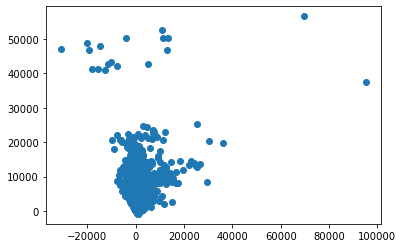

In [32]:
plt.scatter(preds_df.residual,preds_df.predictions)

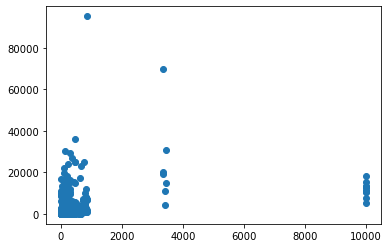

In [33]:
plt.scatter(preds_df.rarity_score, preds_df.abs_residual)

In [34]:
coef_df = pd.DataFrame(dict(zip(X.columns, lr.coef_)), index=['coefs']).T
coef_df

,coefs
type_rarity,2.088204e+03
1of1_score,-4.807479e+00
watch_score,-5.659738e+00
background_score,-8.254833e+02
beard_score,2.896938e+00
chain_score,2.447727e+00
eyes_score,-1.871362e+01
hat_over_headphones_score,2.116199e+01
hat_under_headphones_score,-2.867071e+00
headphones_score,-1.661495e+00


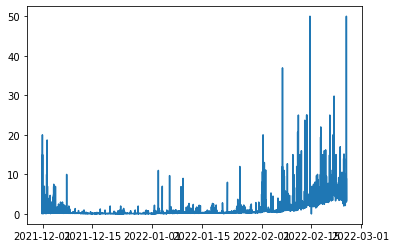

In [35]:
#if the most recent sales data were able to improve model performance to such a degree, what does this mean about the collection? about nft trading?

plt.plot(df.date, df.price)

In [45]:
test.to_csv('./data/model_data_v2.csv', index=False)